In [46]:
import pandas as pd
import numpy as np
import csv

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [17]:
def removeGravity (columns):
    g = 0
    col = columns - (0.9 * g + 0.1 * columns)
    return col

In [18]:
def normalization(columns):
    MinMax = (columns - columns.min(axis=0)) / (columns.max(axis=0) - columns.min(axis=0))
    MinMax = (MinMax * 2) - 1
    MinMax
    return MinMax

In [20]:
def cut_count(MinMax, num, cnt):
    count = int((len(MinMax)-num) / cnt)
    step = []
    temp = 0
    for i in range(0, count):
        temp = num+i*cnt
        step.append(MinMax[temp:temp+cnt])
    return step

In [21]:
def ACF(step, cnt): #자기상관계수 구하는 함수 cnt = 
    answer = 0
    acf = []
    for i in step:
        answer = 0
#         answer = np.linalg.norm(i)
        for j in i:
#             print(j)
            answer = answer + j*j
        answer = answer / cnt
#         print(answer)
        acf.append(answer)
    return acf

In [22]:
def compare_acf(acf):
    num = len(acf) / 2
    avg = 0
    for i in range(1, len(acf), +2):
        if (acf[i-1] > acf[i]):
            avg += acf[i] / acf[i-1]
        else :
            avg += acf[i-1]/acf[i]
    avg = avg / num
    return avg

In [27]:
def seperate_z(x, y) :
    if (y < 0.6):
        return False
    else : return True

In [41]:
def gait_analysis(columns, i) :
#     col = removeGravity(columns)
    MinMax = normalization(columns)
    MinMax_x = MinMax['AccX']
    MinMax_y = MinMax['AccY']
    MinMax_z = MinMax['AccZ']
    
    step_x = cut_count(MinMax_x, 0, 50)
    step_y = cut_count(MinMax_y, 0, 50)
    step_z = cut_count(MinMax_z, 0, 50)
    
    acf_x = ACF(step_x, 50)
    acf_y = ACF(step_y, 50)
    acf_z = ACF(step_z, 50)
    
    compare_x = compare_acf(acf_x)
    compare_y = compare_acf(acf_y)
    compare_z = compare_acf(acf_z)
    result = seperate_z(compare_x, compare_y)
    x = np.array([compare_x, compare_y, compare_z])
    
#     result = seperate_z(np.linalg.norm(x))
#     f = open("result_abnormal.csv", 'a', newline='')
#     wr = csv.writer(f)
#     wr.writerow([i, result, compare_x, compare_y, compare_z])
    
#     f.close()
    if (result == True):
        print('\033[34m', result, '\033[0m', compare_y)
    else : print('\033[31m', result, '\033[0m', compare_y)
    

In [42]:
for i in range(0, 10):
    df = pd.read_csv(f'normal/normalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    gait_analysis(columns, i)

# df = pd.read_csv('normal/normalWalk0.csv')
# columns = df[['AccX', 'AccY', 'AccZ']]
# gait_analysis(columns, i)

 False  0.42734863799633765
 False  0.5214529022522659
 False  0.4948806349330186
 False  0.4660128926103138
 False  0.47593398844191936
 False  0.4753570859353335
 False  0.5588628235131001
 False  0.39187030793391714
 False  0.516232998977531
 False  0.5708844674786915


In [35]:
print('\033[95m' + '안녕' + '\033[96m' + '하세요' + '\033[0m')

안녕하세요


In [43]:
for i in range(0, 10):
    df = pd.read_csv(f'abnormal/abnormalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    gait_analysis(columns, i)

# df = pd.read_csv('abnormal/abnormalWalk0.csv')
# columns = df[['AccX', 'AccY', 'AccZ']]
# gait_analysis(columns, i)

 True  0.64265749840407
 False  0.5334291271897439
 False  0.5146071892679152
 False  0.49672639258696727
 False  0.509277575387875
 False  0.45298563514251855
 False  0.41435461990704653
 False  0.5194365717537837
 False  0.39714196324961265
 False  0.43648189892527234


In [55]:
def print_graph(MinMax, num): # num is cut range
    length = len(MinMax)
    plt.figure(figsize=(20, 5)) # graph size
    plt.xticks(np.arange(0, length+1, num))
    plt.plot(MinMax)
    plt.show()

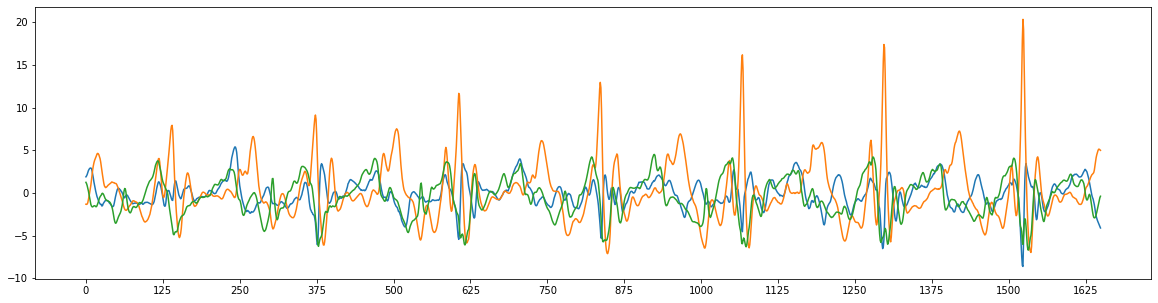

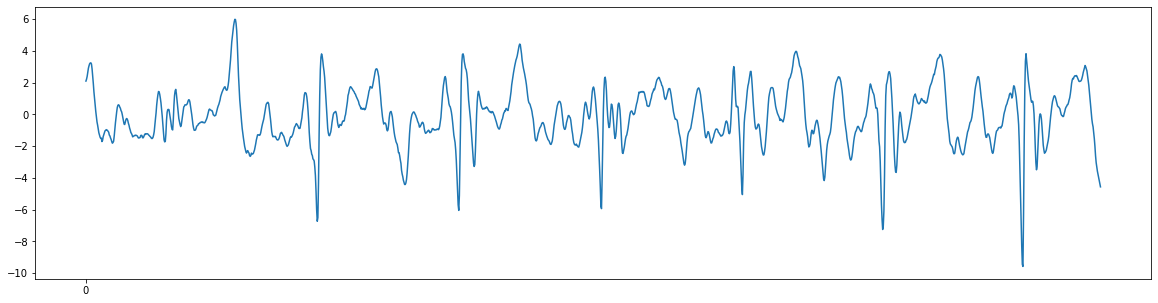

In [63]:
df = pd.read_csv('abnormal/abnormalWalk0.csv')
x = df['AccX']
y = df['AccY']
z = ['AccZ']
columns = df[['AccX', 'AccY', 'AccZ']]
col = removeGravity(columns)
print_graph(col, 125)
plt.figure(figsize=(20, 5)) # graph size
plt.xticks(np.arange(0, len(z)+1, 10))
plt.plot(x)
plt.show()

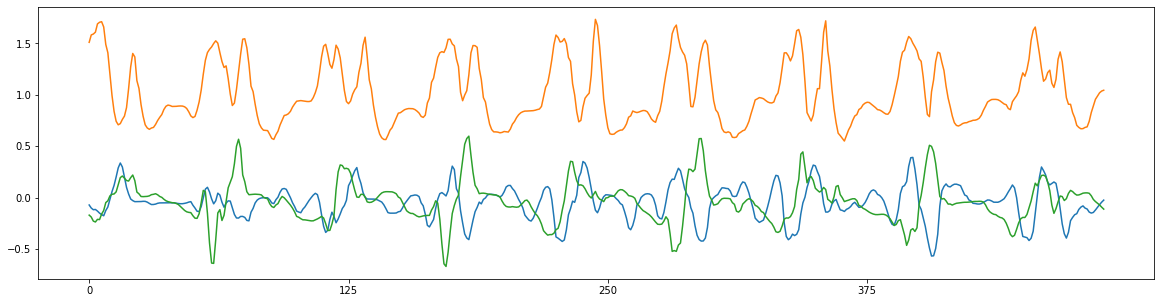

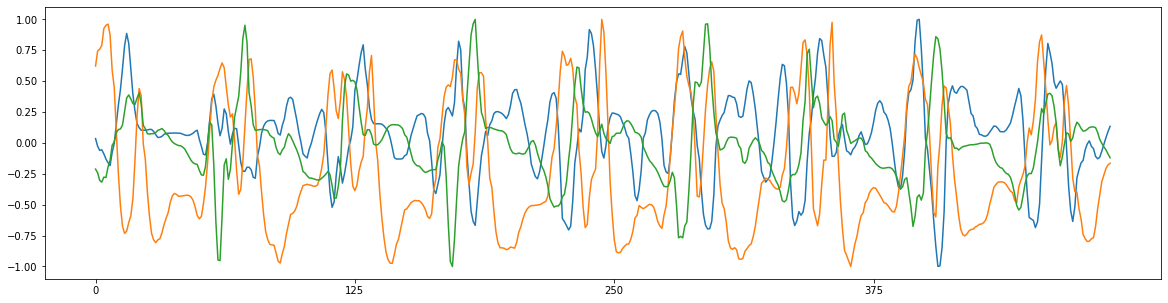

In [49]:
df = pd.read_csv('Walk1/T0_ID135022_Walk1.csv')
columns = df[['accel_x', 'accel_y', 'accel_z']]
print_graph(columns, 125)
MinMax = normalization(columns)
print_graph(MinMax, 125)

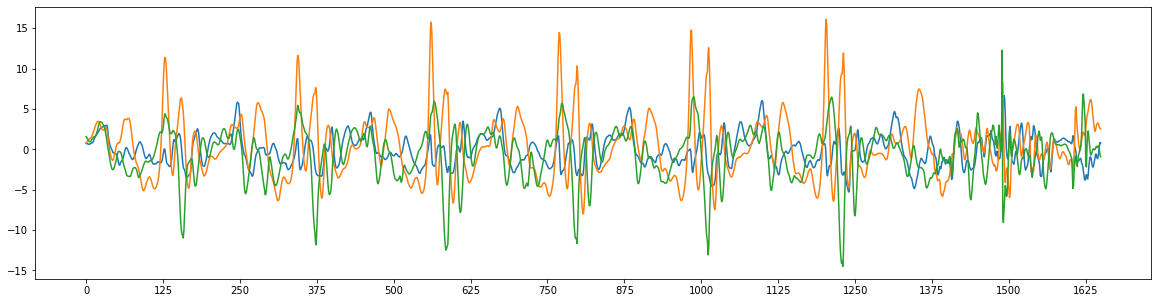

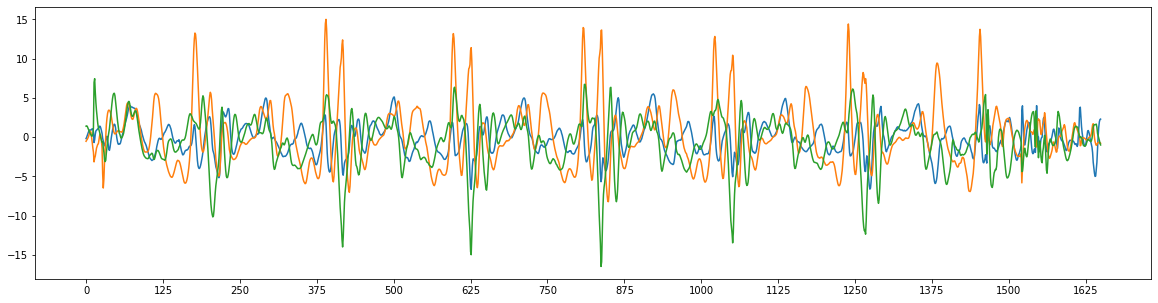

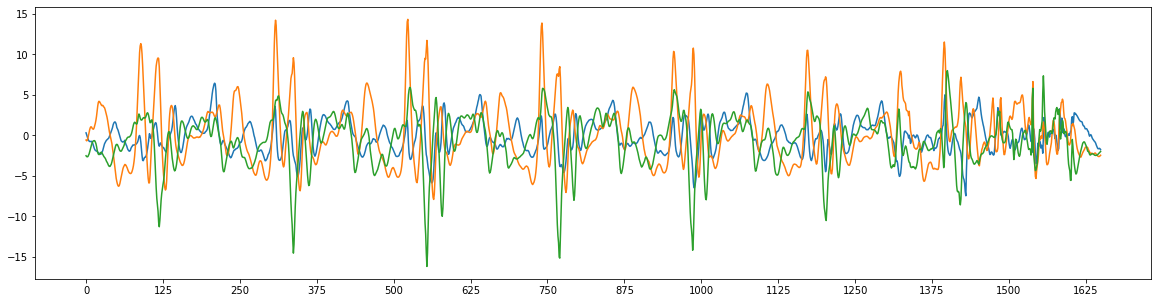

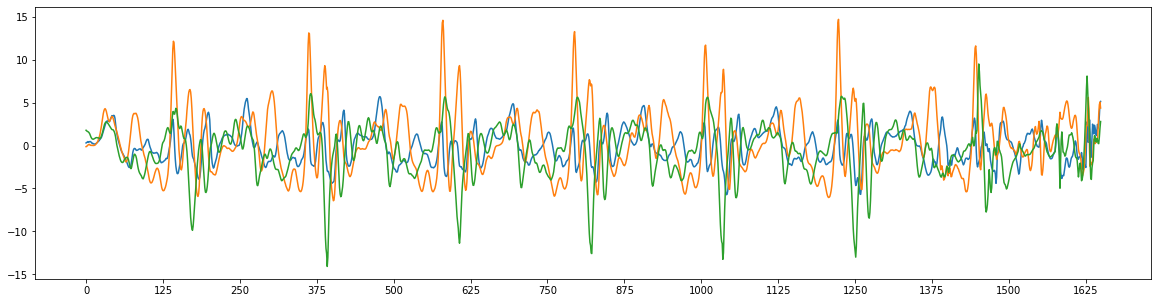

In [48]:
for i in range(2, 6):
    df = pd.read_csv(f'normal/normalWalk{i}.csv')
    columns = df[['AccX', 'AccY', 'AccZ']]
    print_graph(columns, 125)
    MinMax = normalization(columns)
#     print_graph(MinMax, 250)